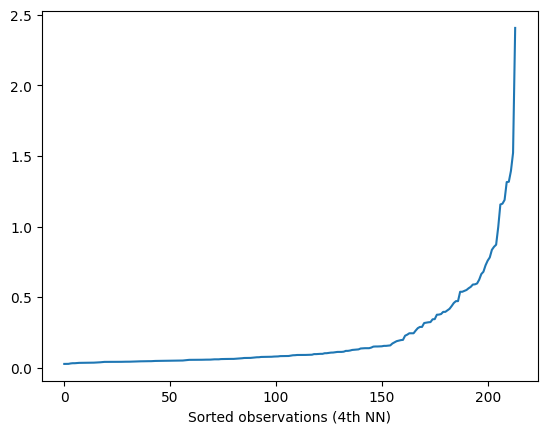

1.3147594227393289


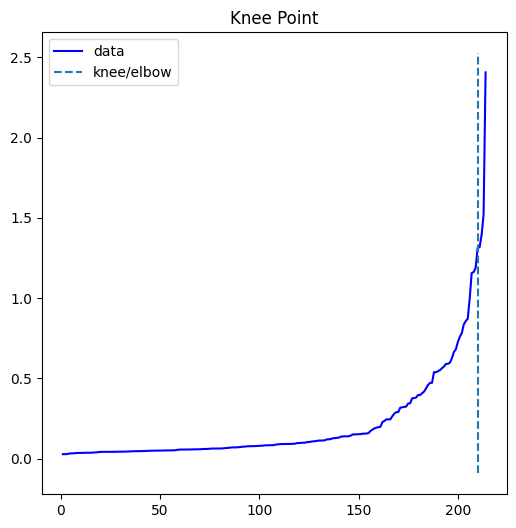

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  1  0  3 -1 -1  3  3  3  3  3  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3
  3  3  3  4  4  3  0  3  0  0  0  0 -1 -1  3  3 -1  2  0  0  0  0 -1  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3]


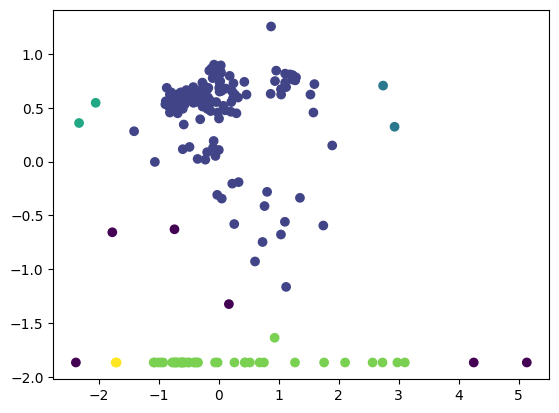

Количесвто кластеров в DBSCAN 5
Adjusted Rand Index: 0.19171034294232953
6


C:\Users\cfifz\PycharmProjects\pythonProject3\venv\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


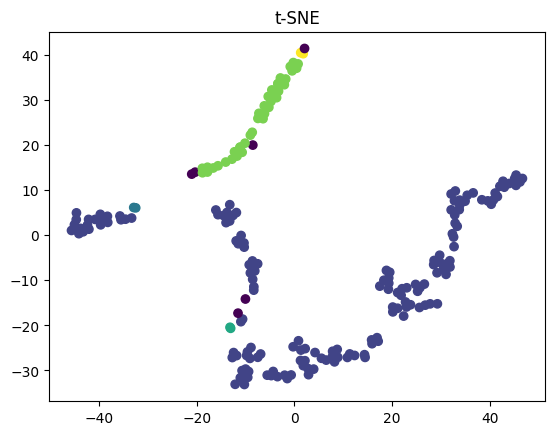

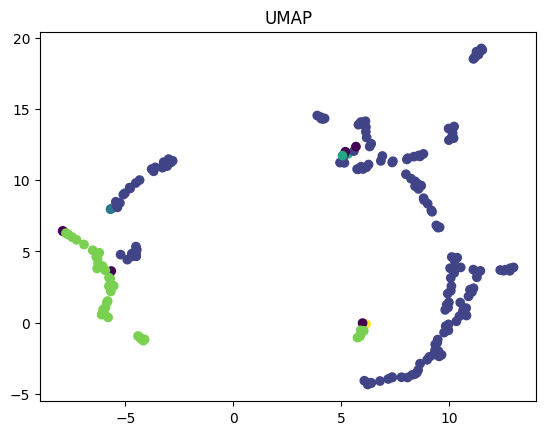

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('glass.csv')
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled)

df = pd.read_csv('glass.csv')
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df)

Z = df.iloc[:, [1, 3]].values
Z = scaler.fit_transform(Z)
Z = pd.DataFrame(Z)


from sklearn.neighbors import NearestNeighbors
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros)
nbrs = NearestNeighbors(n_neighbors = 5).fit(Z)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(Z)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0,
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)
kneedle.plot_knee()
plt.show()
dbs = DBSCAN(eps=0.5, min_samples=2,metric='euclidean',algorithm='auto').fit(Z)

print(dbs.labels_)
plt.scatter(df.iloc[:, 1], df.iloc[:, 3], c=dbs.labels_, cmap='viridis')
plt.show()
print('Количесвто кластеров в DBSCAN',len(set(dbs.labels_)) - (1 if -1 in dbs.labels_ else 0))

from sklearn.metrics import adjusted_rand_score

true_labels = df.iloc[:, 10]
cluster_labels = dbs.labels_
ari = adjusted_rand_score(true_labels, cluster_labels)
print('Adjusted Rand Index:', ari)

print(df.iloc[:, 10].nunique())

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=10, learning_rate=200)
tsne_result = tsne.fit_transform(Z)

plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=dbs.labels_, cmap='viridis')
plt.title('t-SNE')
plt.show()


import umap

umap_result = umap.UMAP(n_components=2, n_neighbors=5, min_dist=0.3).fit_transform(Z)

plt.scatter(umap_result[:, 0], umap_result[:, 1], c=dbs.labels_, cmap='viridis')
plt.title('UMAP')
plt.show()